# Analysing Experimental Data in Table Form with Pandas

There are (as usually the case with python) many different ways and packages to do data analysis and visualisation in python. The package we will look at in this notebook is called [Pandas](https://pandas.pydata.org) and is probably the most widely used python package for data analysis if the data is in table form. There are many ressources online for free that we encourage you to check out. This notebook will really only scratch the surface of what you can do with pandas. 

In [1]:
# Import pandas as pd
import pandas as pd

### Loading data file

The file "data.csv" contains results from a participant who participated in the gaze cue experiment you programmed today! See image below for a reminder of the trial sequence:

![alt text](gazecue.png)

using `.read_csv` we can read in our data file and store it under `df`.

In [2]:
df = pd.read_csv("data.csv")
type(df)

pandas.core.frame.DataFrame

In [3]:
#Let's look at what df looks like!
df

,subject_id,gaze,target,position,congruency,response,rt,correct_response,correct
0,example,left,H,left,congruent,m,0.471526,m,1
1,example,left,F,right,incongruent,y,0.385041,y,1
2,example,right,F,right,congruent,m,0.315384,y,0
3,example,right,H,left,incongruent,y,0.327810,m,0
4,example,right,H,right,congruent,m,0.319960,m,1
5,example,left,F,left,congruent,m,0.359625,y,0
6,example,left,F,left,congruent,y,0.396527,y,1
7,example,left,F,right,incongruent,m,0.341541,y,0
8,example,right,F,right,congruent,y,0.423950,y,1
9,example,left,H,left,congruent,m,0.325600,m,1


As you can see, we have 9 columns with 15 rows, each row representing a trial. `Congruency` refers to whether **gaze cue** and **target position** matched in a trial (if yes = congruent, if no = incongruent), the other variables here are pretty self explanatory.

### Data frame slicing

If you want to look at a specific column you can use square brackets and the column name to *slice* the data frame.

In [4]:
df["gaze"]

0      left
1      left
2     right
3     right
4     right
5      left
6      left
7      left
8     right
9      left
10     left
11    right
12    right
13    right
14     left
15    right
Name: gaze, dtype: object

<div class="alert alert-block alert-info">
<b>Slicing:</b> There is a number of ways to slice a data frame i.e. select specific rows and/or columns. We won't go over every single one here but just note that in pandas there is many ways to come to the same conclusion.
</div>

For more information on indexing in pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

### Data frame methods, helper functions

Pandas has a lot of data frame methods that allow us to do basic analyses.

In [5]:
# run this cell and see what it does
df.describe()

,rt,correct
count,16.000000,16.000000
mean,0.361120,0.437500
std,0.049647,0.512348
min,0.310507,0.000000
25%,0.324190,0.000000
50%,0.338538,0.000000
75%,0.394785,1.000000
max,0.471526,1.000000


<div class="alert alert-block alert-info">
<b>Methods:</b> Dataframe methods can be accessed via giving the name of the dataframe (df) then "." and then you can scroll through available methods with "tab". Remember to add "( )" at the end. There are a lot of useful methods to support basic analyses.
</div>

**Test out different methods below:**

In [6]:
# shows the first 3 rows - especially useful with large data frames
df.head(3)

,subject_id,gaze,target,position,congruency,response,rt,correct_response,correct
0,example,left,H,left,congruent,m,0.471526,m,1
1,example,left,F,right,incongruent,y,0.385041,y,1
2,example,right,F,right,congruent,m,0.315384,y,0


In [7]:
# shows last few rows 
df.tail(1)

,subject_id,gaze,target,position,congruency,response,rt,correct_response,correct
15,example,right,F,left,incongruent,m,0.335534,y,0


In [8]:
# gives you mean for selected column accuracy
df["correct"].mean()
# is the same as 
df.mean()["correct"]

0.4375

In [9]:
# gives unique entries for column gaze
df["gaze"].unique()

array(['left', 'right'], dtype=object)

In [10]:
# counts number of entries per condition for column gaze
df["gaze"].value_counts()

right    8
left     8
Name: gaze, dtype: int64

These helper functions even include some basic plots!

<AxesSubplot:>

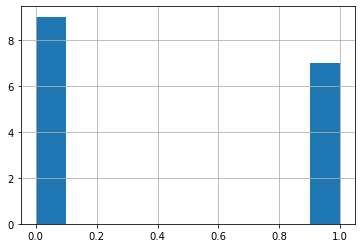

In [11]:
# histogram of accuracy
df["correct"].hist()

<AxesSubplot:>

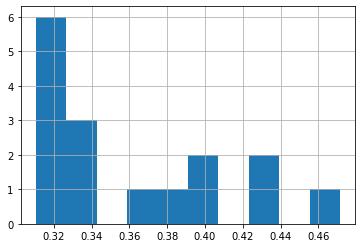

In [12]:
df["rt"].hist()

### Comparisons

You can pretty easily add new columns to a data frame (see below).

In [14]:
# Run this cell and try to understand what's going on here
df["slow"] = df["rt"] > 0.4
df

,subject_id,gaze,target,position,congruency,response,rt,correct_response,correct,slow
0,example,left,H,left,congruent,m,0.471526,m,1,True
1,example,left,F,right,incongruent,y,0.385041,y,1,False
2,example,right,F,right,congruent,m,0.315384,y,0,False
3,example,right,H,left,incongruent,y,0.327810,m,0,False
4,example,right,H,right,congruent,m,0.319960,m,1,False
5,example,left,F,left,congruent,m,0.359625,y,0,False
6,example,left,F,left,congruent,y,0.396527,y,1,False
7,example,left,F,right,incongruent,m,0.341541,y,0,False
8,example,right,F,right,congruent,y,0.423950,y,1,True
9,example,left,H,left,congruent,m,0.325600,m,1,False


<div class="alert alert-block alert-info">
<b>Create columns:</b> We can create new columns by assigning a single value like this: df["number 4"] = 4 or we could do what we did above which is varying the entry depending on entries in other columns: You could also read it like this: If rt is greater than 0.4, assign "true" to slow, else assign False.
</div>

### Group By

If we have different groups within our data - in our case for example we have some congruent and some incongruent trials - we can use `groupby` to get some grouped summary statistics for example, like mean accuracy per group.

In [16]:
df.groupby("congruency")["correct"].mean()

congruency
congruent      0.625
incongruent    0.250
Name: correct, dtype: float64

In [16]:
df.groupby("congruency")["rt"].mean()

congruency
congruent      0.380330
incongruent    0.341911
Name: rt, dtype: float64

instead of computing the mean we can also use groupby to plot grouped histograms:

congruency
congruent      AxesSubplot(0.125,0.125;0.775x0.755)
incongruent    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rt, dtype: object

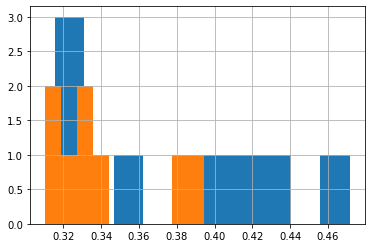

In [18]:
df.groupby("congruency")["rt"].hist()

### Visualisation with seaborn

Let's also go over some data visualisation using the widely used package [seaborn](https://seaborn.pydata.org)

In [19]:
# We first need to import seaborn 
import seaborn as sns

Let's first look at a basic seaborn boxplot:

<AxesSubplot:xlabel='congruency', ylabel='rt'>

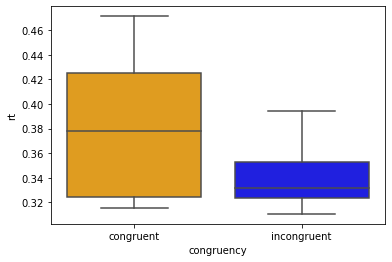

In [20]:
sns.boxplot(x="congruency", y="rt",
            palette=["orange", "b"],
            data=df)

<AxesSubplot:xlabel='congruency', ylabel='rt'>

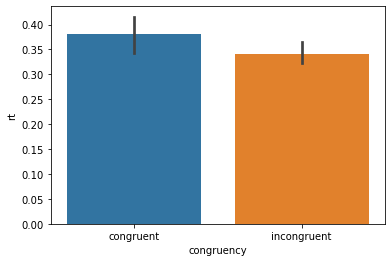

In [21]:
# same but barplot:
sns.barplot(x = "congruency", y = "rt", data = df)

<AxesSubplot:xlabel='congruency', ylabel='rt'>

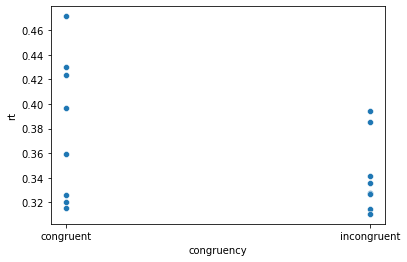

In [24]:
# scatterplot:
sns.scatterplot(x="congruency", y="rt", data=df)

<div class="alert alert-block alert-info">
<b>Seaborn plots:</b> As you can see, these plots always follow a very similar structure: define what kind of plot you want (check documentation for available types), define what should be on the x-axis and what should be on the y-axis, provide name of the dataframe.
</div>